In [2]:
import numpy as np
import pandas as pd
import sklearn as sklearn
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
import numpy as np

n = 10000
x1 = np.random.uniform(size=n)
x2 = np.random.normal(size=n)
eps = np.random.normal(scale=2, size=n)
y = 3 * x1 ** 2 + x2 / 3 + eps

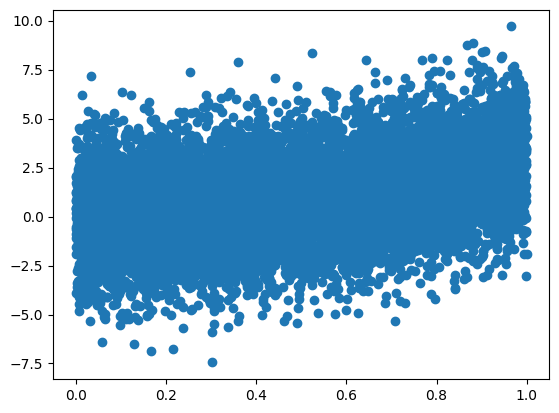

In [4]:
from matplotlib import pyplot as plt

plt.scatter(x1, y)

In [6]:
import numpy as np
from matplotlib import pyplot as plt

def quantile_plot(x, y, by=None, bins=10, by_bins=3, y_fn=np.mean):
    assert len(x) == len(y)

    def qp_data(x, y):
        fac = np.searchsorted(np.quantile(x, q=[i / bins for i in range(1, bins)]), x)
        ufac = np.unique(fac)
        qx = np.array([np.mean(x[fac == f]) for f in ufac])
        qy = np.array([y_fn(y[fac == f]) for f in ufac])
        return qx, qy

    qx, qy = qp_data(x, y)
    if by is None:
        plt.plot(qx, qy, "-o")
    else:
        assert len(x) == len(by)
        plt.plot(qx, qy, "-o", label="ALL", color="lightgrey")
        by_fac = np.searchsorted(np.quantile(by, q=[i / by_bins for i in range(1, by_bins)]), by)
        by_ufac = np.unique(by_fac)
        for i, f in enumerate(np.unique(by_ufac)):
            mask = by_fac == f
            nm = f"{i}) {min(by[mask]):.2f} / {max(by[mask]):.2f}"
            qx, qy = qp_data(x[mask], y[mask])
            plt.plot(qx, qy, "-o", label=nm)
        plt.legend()

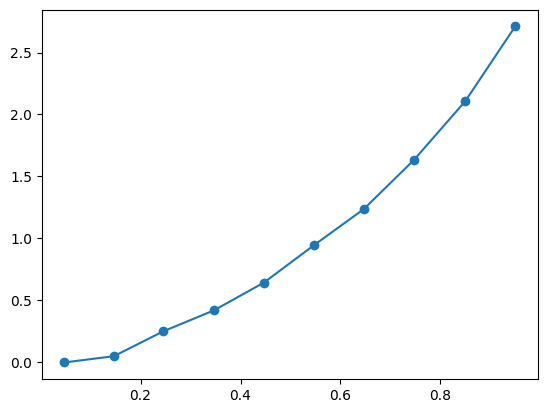

In [7]:
quantile_plot(x1, y, bins=10)

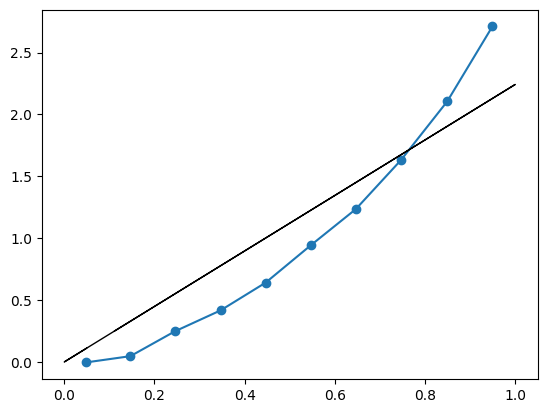

In [8]:
quantile_plot(x1, y)
b1 = sum(x1 * y) / sum(x1 ** 2) # this is only considering the most dominant independent variable
plt.plot(x1, x1 * b1, color='black', linewidth=1)

### After Feature engineering

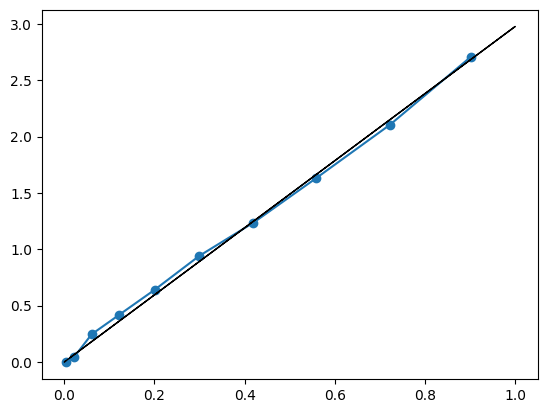

In [10]:
x1_sq = x1 ** 2
quantile_plot(x1_sq, y, bins=10)
b1_sq = sum(x1_sq * y) / sum(x1_sq ** 2)
plt.plot(x1_sq, x1_sq * b1_sq, color='black', linewidth=1)

In [12]:
def squared_error(y, yhat):
    return np.mean((y - yhat) ** 2)

print(squared_error(y, np.mean(y)), squared_error(y, x1 * b1), squared_error(y, x1_sq * b1_sq))

4.873189105275307 4.203989775269399 4.109289196420005


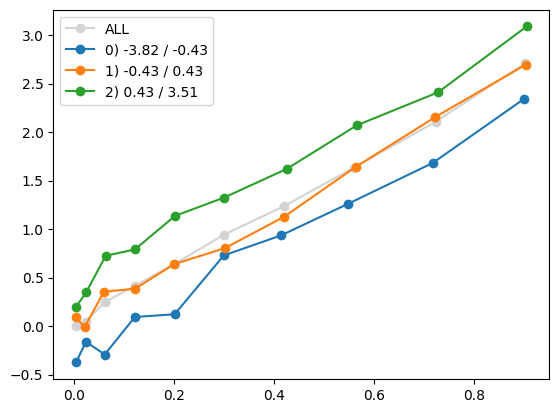

In [13]:
quantile_plot(x1_sq, y, bins=10, by=x2, by_bins=3)